In [1]:
import random
import librosa
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from os import walk

In [2]:
# A python implementation of the inexact_alm_rpca

https://github.com/posenhuang/singingvoiceseparationrpca/blob/master/inexact_alm_rpca/inexact_alm_rpca.m

In [3]:
D = np.random.rand(5, 4)

In [4]:
m, n = D.shape

In [8]:
def implement_inexact_alm_rpca(D, Lambda=1/np.sqrt(m), tol=1e-7, maxIter=1000):
    Y = D
    norm_two = sp.linalg.svd(Y)[1][0] # largest singular value
    norm_inf = sp.linalg.norm(Y, ord=np.inf, axis=None, keepdims=False)
    dual_norm = max(norm_two, norm_nuclear)
    Y = Y/dual_norm
    
    A_hat = np.zeros([m, n])
    E_hat = np.zeros([m, n])
    mu = 1.25/norm_two # can be tuned
    mu_bar = mu * 1e7
    rho = 1.5 # can be tuned
    d_norm = sp.linalg.norm(Y, ord='fro')
    
    iter_count = 0
    total_svd = 0
    converged = False
    stopCriterion = 1
    sv = 10
    
    while not converged:
        iter_count += 1
        temp_T = D - A_hat + (1/mu)*Y
        E_hat = np.max(temp_T - Lambda/mu, 0)
        E_hat += np.min(temp_T + Lambda/mu, 0)
        
        U, s, V = sp.linalg.svd(D - E_hat + (1/mu) * Y, full_matrices=False)
        svp = (s > 1/mu).sum()
        if svp < sv:
            sv = min(svp + 1, n)
        else:
            sv = min(svp + round(0.05 * n), n)

        A_hat = U[:, :svp] * (np.diag(s[:svp] - 1/mu)) * V[:, :svp].T

        total_svd += 1

        Z = D - A_hat - E_hat

        Y += mu * Z
        mu = min(mu * rho, mu_bar)

        stopCriterion = sp.linalg.norm(Z, ord='fro') / d_norm
        if stopCriterion < tol:
            converged = True

        if total_svd % 10 == 0:
            print(str(total_svd) + ' r(A) ' + str(np.linalg.matrix_rank(A_hat)))
            print('|E|_0' + str((E_hat > 0).sum()))
            print('stopCriterion:' + str(stopCriterion))

        if not converged & iter_count >= maxIter:
            print('Maximum iterations reached')
            coverged = 1
    return A_hat, E_hat, iter_count

In [5]:
Lambda=1/np.sqrt(m); tol=1e-7; maxIter=1000

In [6]:
Y = D
norm_two = sp.linalg.svd(Y)[1][0] # largest singular value
norm_inf = sp.linalg.norm(Y, ord=np.inf)
dual_norm = max(norm_two, norm_inf)
Y = Y/dual_norm

A_hat = np.zeros([m, n])
E_hat = np.zeros([m, n])
mu = 1.25/norm_two # can be tuned
mu_bar = mu * 1e7
rho = 1.5 # can be tuned
d_norm = sp.linalg.norm(Y, ord='fro')

iter_count = 0
total_svd = 0
converged = False
stopCriterion = 1
#sv = 10

while not converged:
    iter_count += 1
    temp_T = D - A_hat + (1/mu)*Y
    E_hat = np.max(temp_T - Lambda/mu, 0)
    E_hat += np.min(temp_T + Lambda/mu, 0)

    U, s, V = sp.linalg.svd(D - E_hat + (1/mu) * Y, full_matrices=False)
    svp = (s > 1/mu).sum()

    A_hat = np.dot(np.dot(U[:, :svp], (np.diag(s[:svp] - 1/mu))), V[:, :svp].T)

    total_svd += 1

    Z = D - A_hat - E_hat

    Y += mu * Z
    mu = min(mu * rho, mu_bar)

    stopCriterion = sp.linalg.norm(Z, ord='fro') / d_norm
    if stopCriterion < tol:
        converged = True

    if total_svd % 10 == 0:
        print(str(total_svd) + ' r(A) ' + str(np.linalg.matrix_rank(A_hat)))
        print('|E|_0' + str((E_hat > 0).sum()))
        print('stopCriterion:' + str(stopCriterion))

    if (not converged) & (iter_count >= maxIter):
        print('Maximum iterations reached')
        coverged = True

10 r(A) 4
|E|_01
stopCriterion:617.210465036
20 r(A) 4
|E|_01
stopCriterion:8744184.66154
30 r(A) 4
|E|_01
stopCriterion:45165827970.2
40 r(A) 4
|E|_02
stopCriterion:9.09438039656e+12
50 r(A) 3
|E|_03
stopCriterion:2.0462261655e+14
60 r(A) 3
|E|_02
stopCriterion:5.20857075407e+21
70 r(A) 1
|E|_02
stopCriterion:1.51914796099e+26
80 r(A) 1
|E|_01
stopCriterion:7.60480565784e+30
90 r(A) 1
|E|_02
stopCriterion:1.76292456245e+35
100 r(A) 1
|E|_03
stopCriterion:4.22521948532e+37
110 r(A) 1
|E|_02
stopCriterion:9.68222146607e+44
120 r(A) 1
|E|_03
stopCriterion:2.53818914915e+50
130 r(A) 1
|E|_03
stopCriterion:6.65371065153e+54
140 r(A) 1
|E|_02
stopCriterion:4.82838513096e+58
150 r(A) 1
|E|_03
stopCriterion:1.26452318777e+65
160 r(A) 1
|E|_04
stopCriterion:2.16338298635e+64
170 r(A) 1
|E|_02
stopCriterion:3.39442924897e+73
180 r(A) 1
|E|_02
stopCriterion:1.11228634471e+78
190 r(A) 1
|E|_01
stopCriterion:5.83825727482e+77
200 r(A) 1
|E|_01
stopCriterion:2.38861673475e+88
210 r(A) 1
|E|_02
stop

/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:35: RuntimeWarning: overflow encountered in multiply
/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:26: RuntimeWarning: invalid value encountered in add


ValueError: array must not contain infs or NaNs

In [26]:
U[:, :svp]

array([[-0.40909314,  0.6300933 ],
       [-0.4436389 ,  0.21702848],
       [-0.45819373,  0.18680076],
       [-0.49003762, -0.33473086],
       [-0.43098604, -0.63948557]])

In [27]:
(np.diag(s[:svp] - 1/mu))

array([[ 10.80530975,   0.        ],
       [  0.        ,   0.24705808]])

In [28]:
U[:, :svp] * (np.diag(s[:svp] - 1/mu))

ValueError: operands could not be broadcast together with shapes (5,2) (2,2) 

In [29]:
np.dot(U[:, :svp], (np.diag(s[:svp] - 1/mu)))

array([[-4.42037808,  0.15566964],
       [-4.79365575,  0.05361864],
       [-4.95092521,  0.04615064],
       [-5.29500825, -0.08269796],
       [-4.65693763, -0.15799008]])

In [25]:
V[:, :svp].T

array([[ 0.76446481, -0.34951878, -0.53929191,  0.05093532],
       [ 0.07149138,  0.88060082, -0.46217079,  0.07635018]])

In [20]:
U

array([[-0.40909314,  0.6300933 ,  0.65142197,  0.08997076],
       [-0.4436389 ,  0.21702848, -0.56596806,  0.15915765],
       [-0.45819373,  0.18680076, -0.41208655,  0.0695892 ],
       [-0.49003762, -0.33473086,  0.11889627, -0.79241023],
       [-0.43098604, -0.63948557,  0.26716647,  0.57776939]])

In [21]:
V

array([[ 0.76446481,  0.07149138,  0.38926333, -0.50887778],
       [-0.34951878,  0.88060082,  0.21554288, -0.23647429],
       [-0.53929191, -0.46217079,  0.33360334, -0.61989614],
       [ 0.05093532,  0.07635018, -0.83109816, -0.54849986]])

In [23]:
s

array([ 11.65676093,   1.09850926,   0.57723258,   0.45756402])

In [24]:
U * s

array([[-4.76870092,  0.69216333,  0.37602199,  0.04116738],
       [-5.17139261,  0.2384078 , -0.32669521,  0.07282482],
       [-5.34105481,  0.20520237, -0.23786978,  0.03184151],
       [-5.71225136, -0.36770495,  0.0686308 , -0.36257841],
       [-5.02390121, -0.70248082,  0.15421719,  0.26436649]])

In [14]:
V

array([[ 0.76446481,  0.07149138,  0.38926333, -0.50887778],
       [-0.34951878,  0.88060082,  0.21554288, -0.23647429],
       [-0.53929191, -0.46217079,  0.33360334, -0.61989614],
       [ 0.05093532,  0.07635018, -0.83109816, -0.54849986]])

In [13]:
V[:, :svp].T

array([[ 0.76446481, -0.34951878, -0.53929191,  0.05093532],
       [ 0.07149138,  0.88060082, -0.46217079,  0.07635018]])

In [12]:
U[:, :svp]

array([[-0.40909314,  0.6300933 ],
       [-0.4436389 ,  0.21702848],
       [-0.45819373,  0.18680076],
       [-0.49003762, -0.33473086],
       [-0.43098604, -0.63948557]])

In [11]:
s[:svp] - 1/mu

array([ 10.80530975,   0.24705808])

In [10]:
np.diag(s[:svp] - 1/mu)

array([[ 10.80530975,   0.        ],
       [  0.        ,   0.24705808]])

In [7]:
s[:svp]

array([ 11.65676093,   1.09850926])

In [17]:
s > 1/mu

array([ True,  True,  True, False], dtype=bool)

In [13]:
U[:, :svp]

array([[-0.26688076,  0.39419956, -0.00435179],
       [-0.34335735,  0.65592237, -0.51759186],
       [-0.43626387, -0.2285003 ,  0.26644846],
       [-0.46029445, -0.59777301, -0.61020528],
       [-0.63928339,  0.06948088,  0.53734017]])

In [14]:
s[:svp] - 1/mu

array([ 4.55001963,  0.79042564,  0.04573409])

In [15]:
V[:, :svp].T

array([[ 0.26446964, -0.18453825,  0.75822658,  0.56665148],
       [ 0.03722954, -0.53486915, -0.59248956,  0.60123629],
       [-0.54892328, -0.71577552,  0.26936012, -0.33733331]])

In [12]:
A_hat

array([[-0.41329907,  0.11326803,  0.43469793,  1.23738851],
       [-0.43235804,  0.1184913 ,  0.45474369,  1.29444972],
       [-0.33752916,  0.09250266,  0.35500497,  1.01053868],
       [-0.23039413,  0.06314142,  0.24232295,  0.68978389],
       [-0.19641793,  0.05382996,  0.20658761,  0.58806153]])

def choosvd(n, d):
    if n <= 100:
        if d/n <= 0.02:
            y = 1
        else:
            y = 0
    elif n <= 200:
        if d/n <= 0.06:
            y = 1
        else:
            y = 0
    elif n <= 300:
        if d/n <= 0.26:
            y = 1
        else:
            y = 0
    elif n <= 400:
        if d/n <= 0.28:
            y = 1
        else:
            y = 0
    elif n <= 500:
        if d/n <= 0.34:
            y = 1
        else:
            y = 0
    elif n <= 300:
        if d/n <= 0.38:
            y = 1
        else:
            y = 0
    return y

In [3]:
file_path = '../data/MIR-1K_for_MIREX/Wavfile/'

In [4]:
aa = librosa.load(file_path+'yifen_5_11.wav', sr=16000, mono=False)

In [5]:
len(aa)

2

In [6]:
aa[0][0]

array([ 0.06491089,  0.04870605,  0.02584839, ..., -0.14379883,
       -0.12634277, -0.1270752 ], dtype=float32)

In [7]:
aa[0][1]

array([-0.00048828, -0.01309204, -0.0100708 , ...,  0.00143433,
        0.00149536,  0.00149536], dtype=float32)

In [9]:
len(aa[0][0])

71953

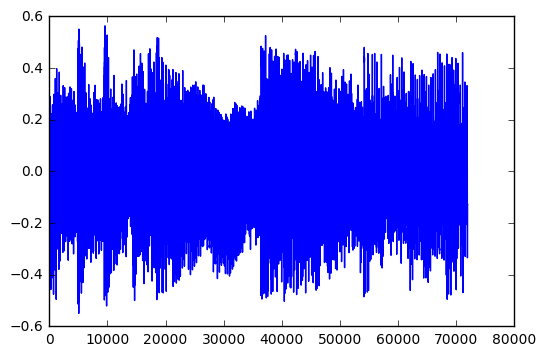

In [8]:
plt.plot(aa[0][0])
plt.show()